<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Взаимосвязи-в-данных" data-toc-modified-id="Взаимосвязи-в-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Взаимосвязи в данных</a></span><ul class="toc-item"><li><span><a href="#Пол-клиента,-день-недели-и-чаевые" data-toc-modified-id="Пол-клиента,-день-недели-и-чаевые-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пол клиента, день недели и чаевые</a></span></li><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корреляции</a></span></li></ul></li><li><span><a href="#Разные-свойства" data-toc-modified-id="Разные-свойства-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разные свойства</a></span><ul class="toc-item"><li><span><a href="#cdf-и-правило-3-сигм" data-toc-modified-id="cdf-и-правило-3-сигм-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cdf и правило 3 сигм</a></span></li><li><span><a href="#Куртозис-и-эксцесс" data-toc-modified-id="Куртозис-и-эксцесс-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Куртозис и эксцесс</a></span></li><li><span><a href="#Гистограмма-и-kde" data-toc-modified-id="Гистограмма-и-kde-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гистограмма и kde</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Стандартизация</a></span></li><li><span><a href="#Сдвиги-по-осям-X-и-Y" data-toc-modified-id="Сдвиги-по-осям-X-и-Y-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сдвиги по осям X и Y</a></span></li><li><span><a href="#Кодирование-категориальных-переменных" data-toc-modified-id="Кодирование-категориальных-переменных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Кодирование категориальных переменных</a></span></li></ul></li></ul></div>

#  Взаимосвязи в данных

В этой тетрадке мы поговорим про корреляции. 

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

In [2]:
from statsmodels.api import qqplot # можно также stats.probplot

In [3]:
%matplotlib inline

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

## Пол клиента, день недели и чаевые

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

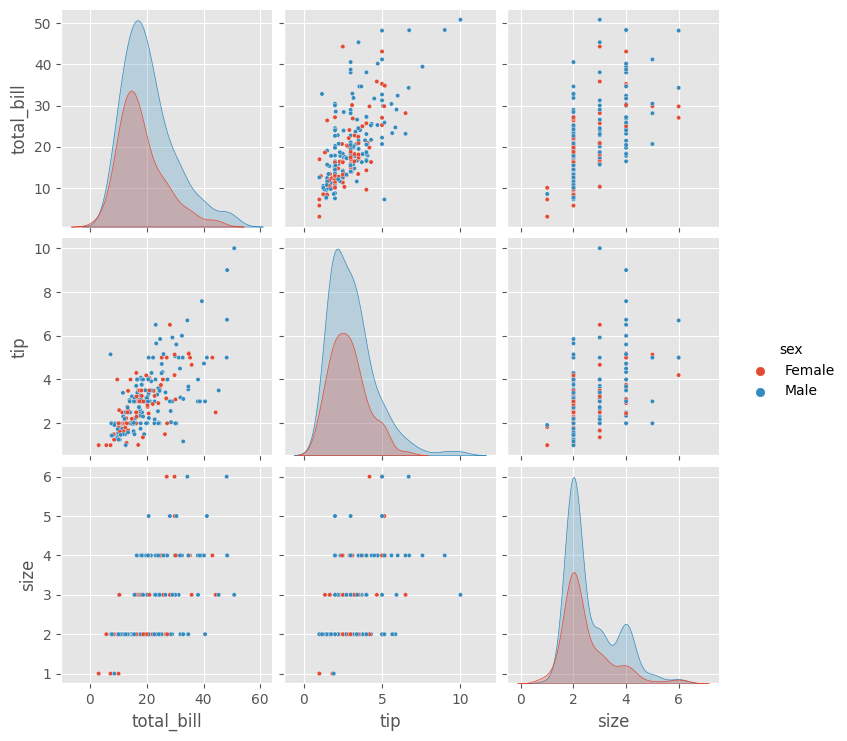

In [12]:
sns.pairplot(df, hue = 'sex', height = 2.5, plot_kws = {"s": 10}); #kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

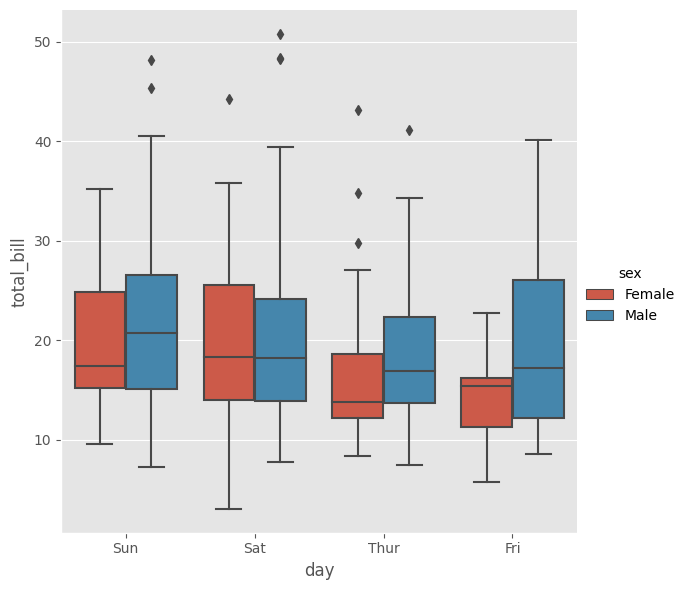

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="box", height=6);

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__ 

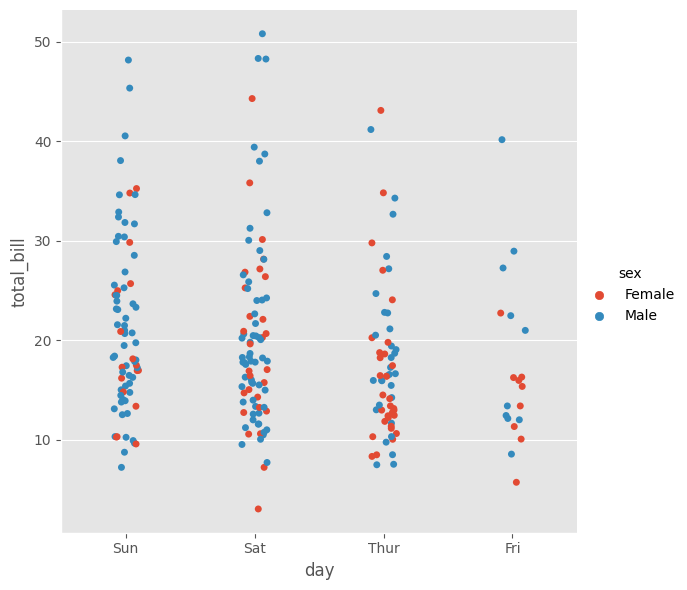

In [14]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, height=6);

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

## Корреляции

__Можно посмотреть на взаимосвязь только двух переменных.__

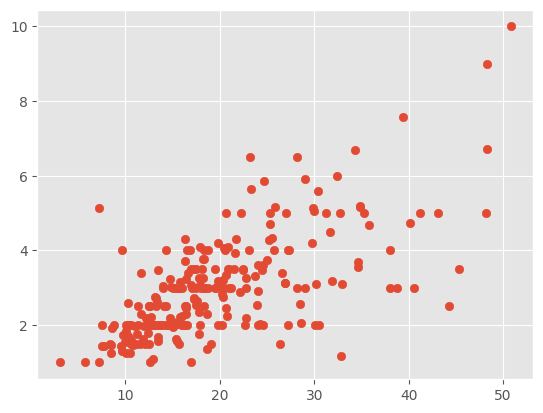

In [15]:
plt.scatter(df['total_bill'], df['tip']);

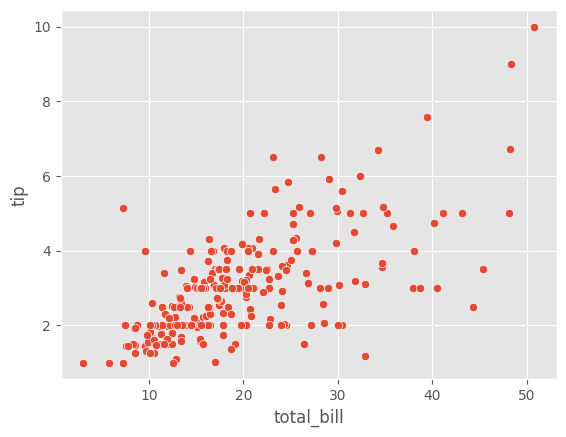

In [16]:
sns.scatterplot(x="total_bill", y="tip", data=df);

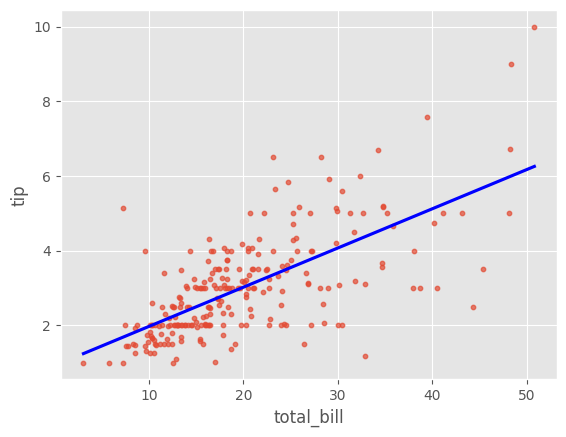

In [17]:
sns.regplot(x="total_bill", y="tip", data=df, 
            line_kws={'color':'blue'},
            scatter_kws={'s':10, 'alpha':0.7},
            ci=None
           );

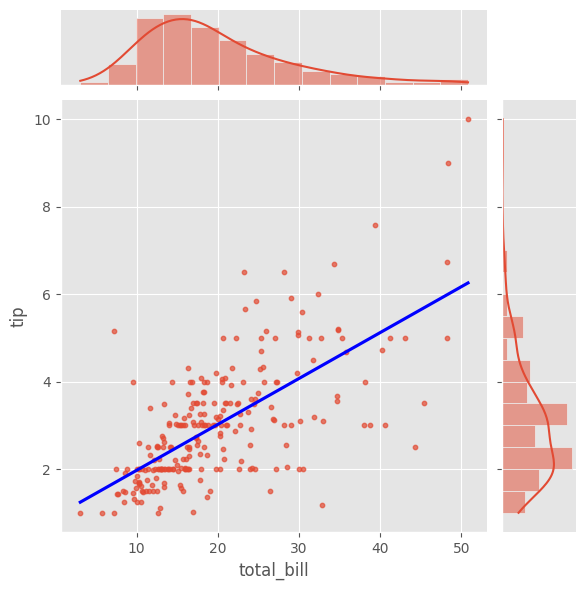

In [18]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='reg',
            line_kws={'color':'blue'},
            scatter_kws={'s':10, 'alpha':0.7},
            ci=None
             );

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [19]:
df.corr(numeric_only = True) #method='pearson'

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [20]:
df.corr(numeric_only = True, method = 'spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


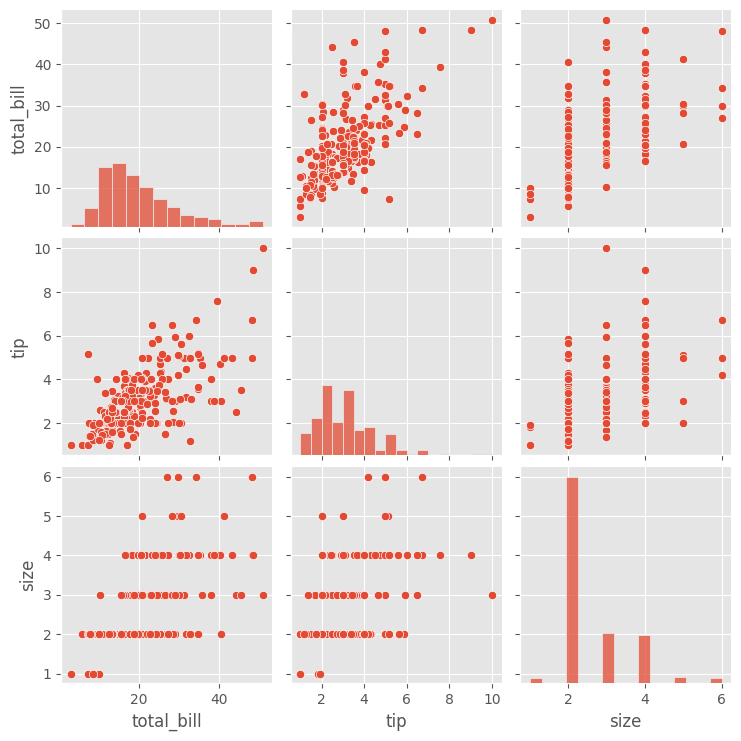

In [21]:
sns.pairplot(df, kind = 'scatter');

Можно визуализировать матрицу с помощью тепловой карты. 

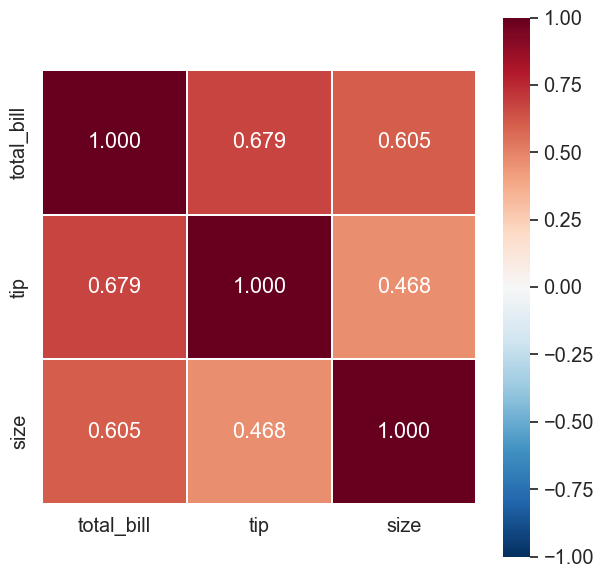

In [22]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr(numeric_only = True, method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype = bool))


sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))

sns.heatmap(corr, 
            #mask=mask, 
            square=True,
            annot=True, fmt=".3f", 
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

In [23]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])

stats.spearmanr(x, y).correlation

0.644578313253012

In [24]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])

stats.pearsonr(rx, ry)[0]

0.6445783132530122

In [25]:
# корреляционная матрица
np.corrcoef(x,y)

array([[1.        , 0.66187928],
       [0.66187928, 1.        ]])

# Разные свойства

## Куртозис и эксцесс

In [26]:
x

array([10,  8,  6,  7,  4, 10,  9,  5])

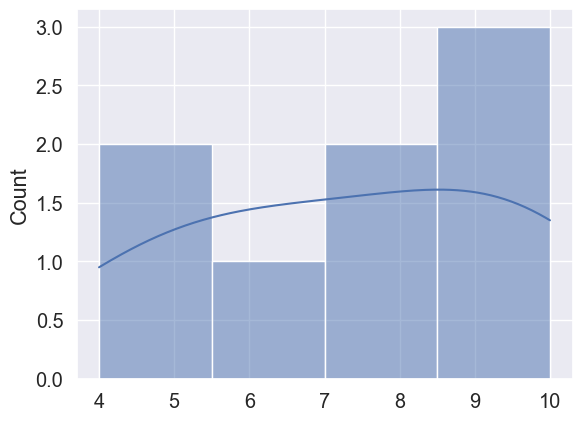

In [27]:
sns.histplot(x, kde = True);

In [28]:
x.mean() - 3*x.std(), x.mean() + 3*x.std()
# в диапозон 3 mu +/- 3*sigma лежат почти все данные

(1.022097120213469, 13.72790287978653)

In [29]:
stats.kurtosis(x) - 3 # не равно 0 - хвосты менее тяжелые, чем у нормально распределения

-4.33882892835897

In [30]:
stats.skew(x) # коэффицент ассиметрии > 0 - перекос вправо

-0.18140353255785455

0.18140353255785455

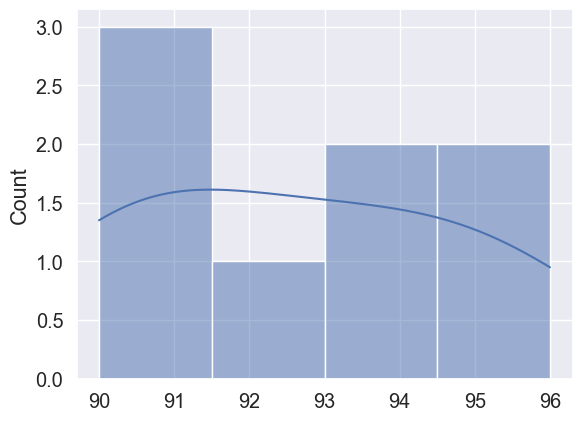

In [31]:
sns.histplot(100-x, kde=True);
# перекос влево
stats.skew(100-x)

## Гистограмма и kde

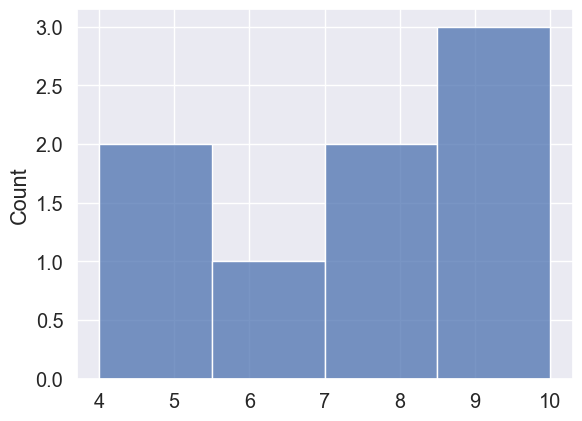

In [32]:
sns.histplot(x);

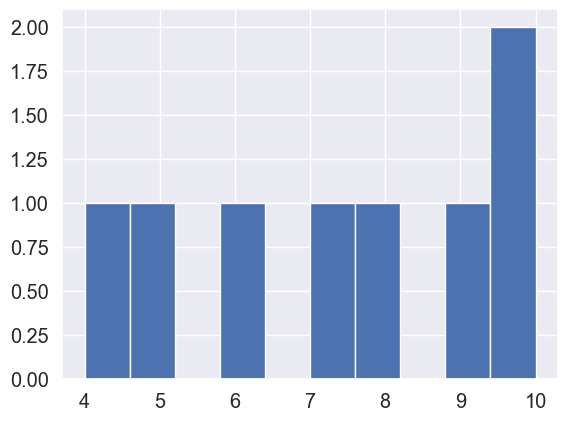

In [33]:
plt.hist(x);

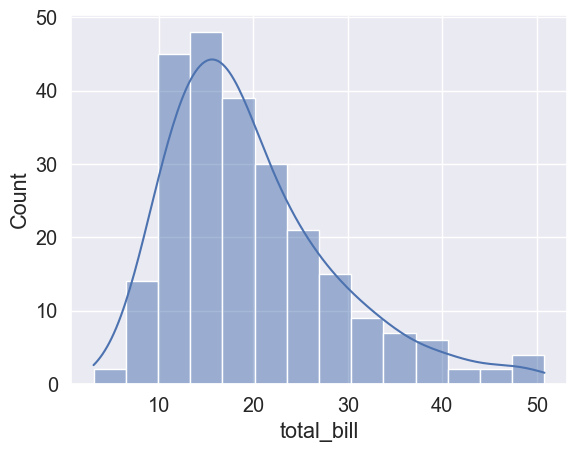

In [36]:
# самый рекомендуемый способ гистограммы
sns.histplot(data = df, x = 'total_bill', kde = True);

In [37]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially whe

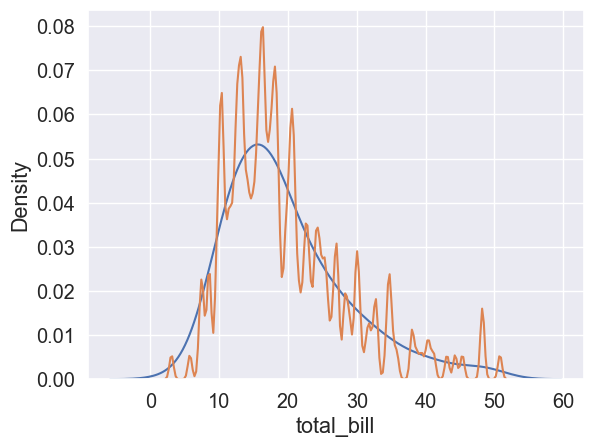

In [38]:
sns.kdeplot(data=df, x='total_bill', bw_adjust=1);
sns.kdeplot(data=df, x='total_bill', bw_adjust=0.1);

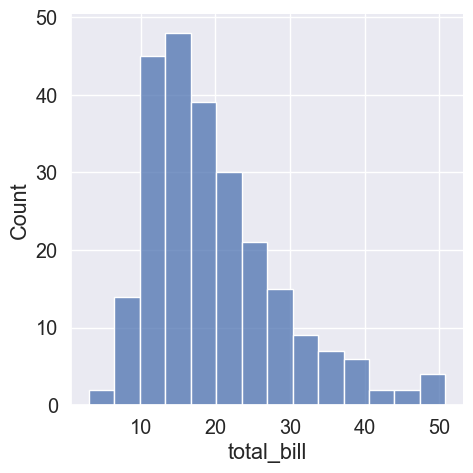

In [39]:
sns.displot(data=df, x='total_bill');

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_24183/1173958573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill']);


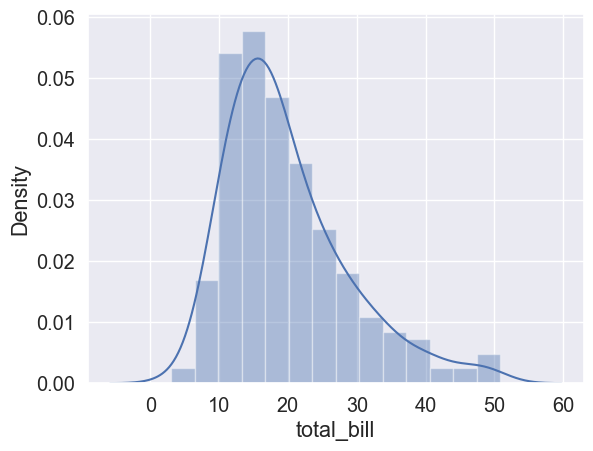

In [40]:
sns.distplot(df['total_bill']);

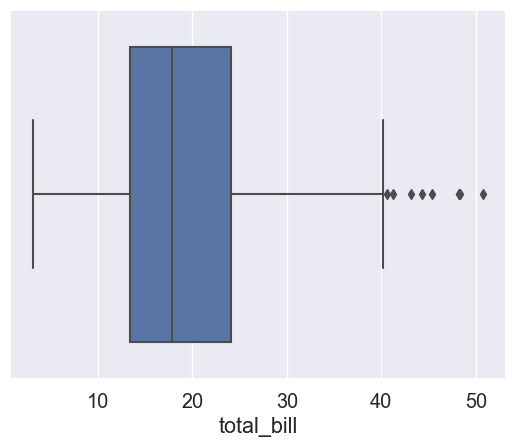

In [41]:
sns.boxplot(x=df['total_bill']);

In [42]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


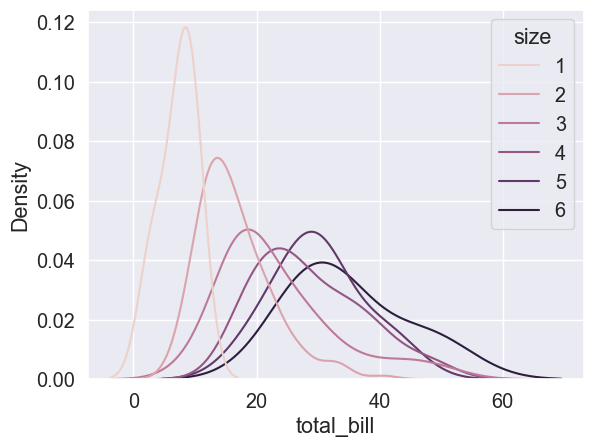

In [43]:
sns.kdeplot(data=df, x='total_bill', hue='size', common_norm=False);

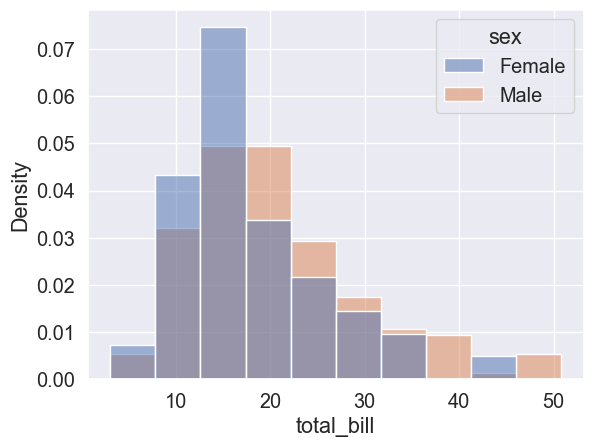

In [44]:
sns.histplot(data=df, x='total_bill', hue='sex', common_norm=False, bins=10, stat='density');

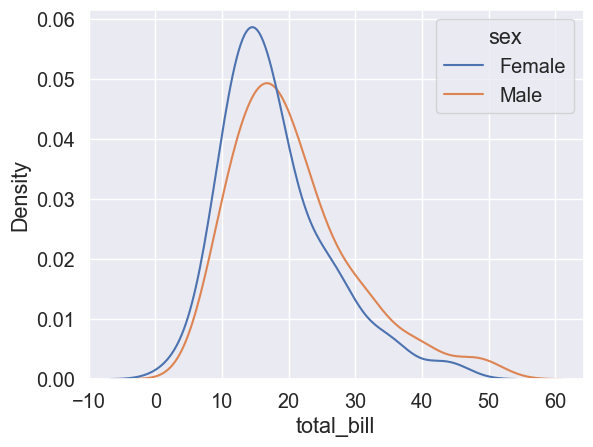

In [45]:
sns.kdeplot(data=df, x='total_bill', hue='sex', common_norm=False);#, bins=10, stat='density');

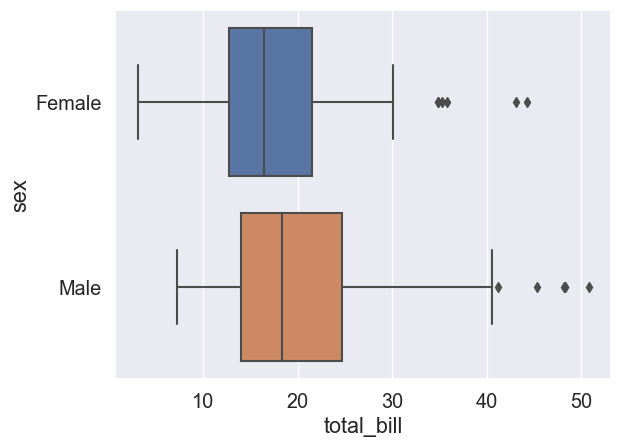

In [46]:
sns.boxplot(data=df, x='total_bill', y='sex');

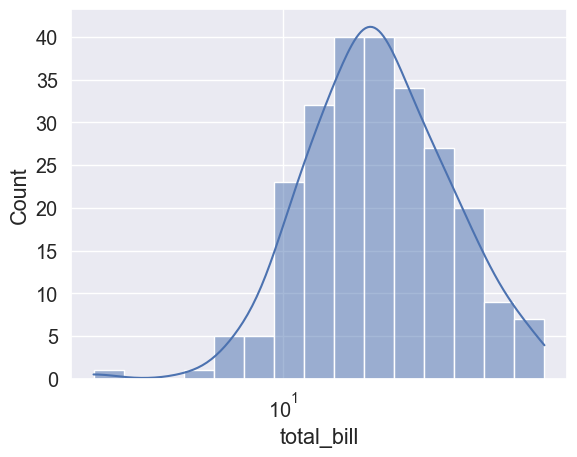

In [49]:
sns.histplot(data=df, x='total_bill', kde = True, log_scale = True);

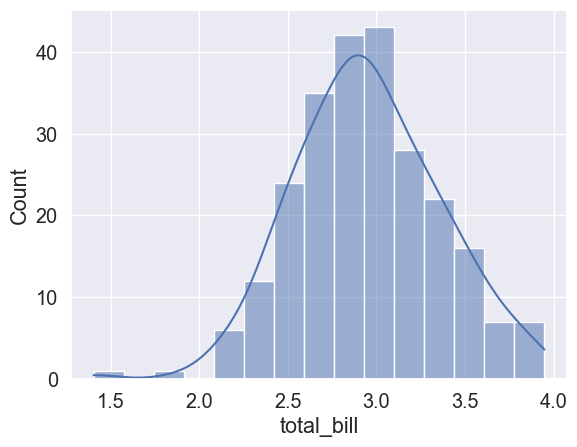

In [50]:
sns.histplot(np.log(1+df['total_bill']), kde=True);

In [51]:
# from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
x_transformed = transformer.fit_transform(df[['total_bill']])

In [52]:
transformer.lambdas_

array([0.00806546])

In [53]:
df['total_bill_boxcox'] = x_transformed
df['total_bill_log'] = np.log(1+df['total_bill'])

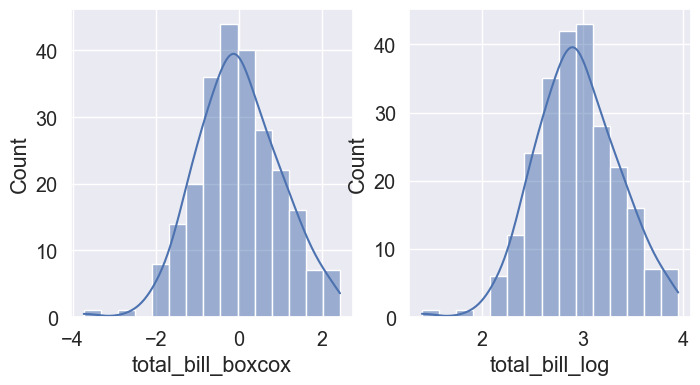

In [54]:
plt.figure(figsize=(8,4))


plt.subplot(121)
sns.histplot(df['total_bill_boxcox'], kde=True);

plt.subplot(122)
sns.histplot(df['total_bill_log'], kde=True);

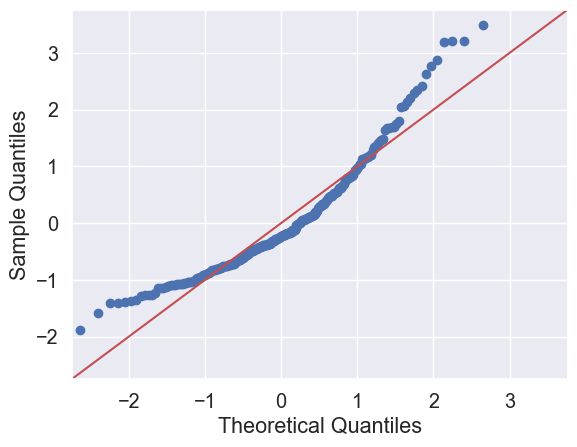

In [55]:
qqplot(df['total_bill'], fit=True, line='45')
plt.show()

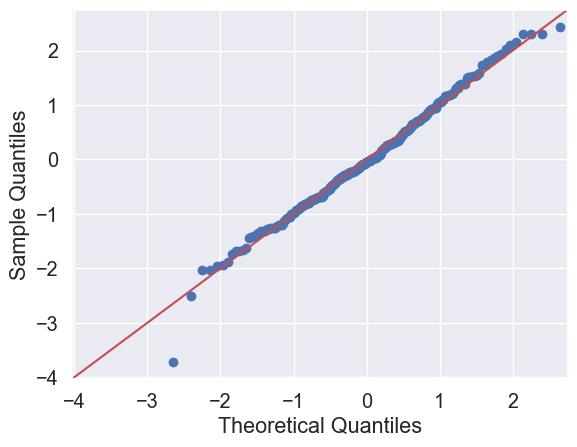

In [56]:
qqplot(df['total_bill_boxcox'], fit=True, line='45')
plt.show()

## Стандартизация

In [57]:
x = df['total_bill']

x.mean(), x.std()

(19.78594262295082, 8.902411954856856)

In [58]:
z = (x-x.mean())/x.std()

# стандартизация
z.mean(), z.std()

(-6.028875031263658e-17, 1.0)

## Сдвиги по осям X и Y

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_boxcox,total_bill_log
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.146272,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.263499,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,0.343298,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.621586,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,0.709646,3.242202


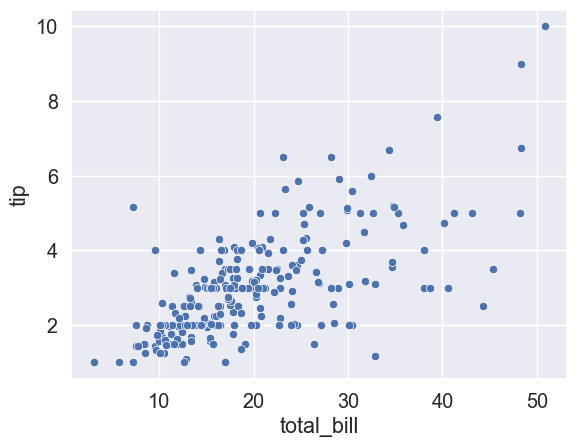

In [60]:
sns.scatterplot(data=df, x='total_bill', y='tip');

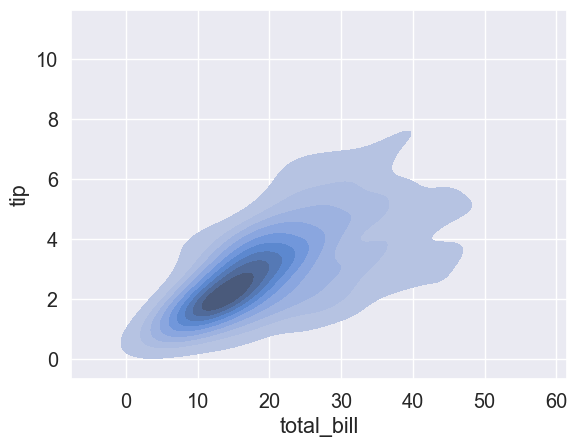

In [61]:
sns.kdeplot(data=df, x='total_bill', y='tip', fill=True,);

In [62]:
df.cov(numeric_only = True)

,total_bill,tip,size,total_bill_boxcox,total_bill_log
total_bill,79.252939,8.323502,5.065983,8.593448,3.538954
tip,8.323502,1.914455,0.643906,0.912470,0.375816
size,5.065983,0.643906,0.904591,0.564807,0.232646
total_bill_boxcox,8.593448,0.912470,0.564807,1.004115,0.413791
total_bill_log,3.538954,0.375816,0.232646,0.413791,0.170522


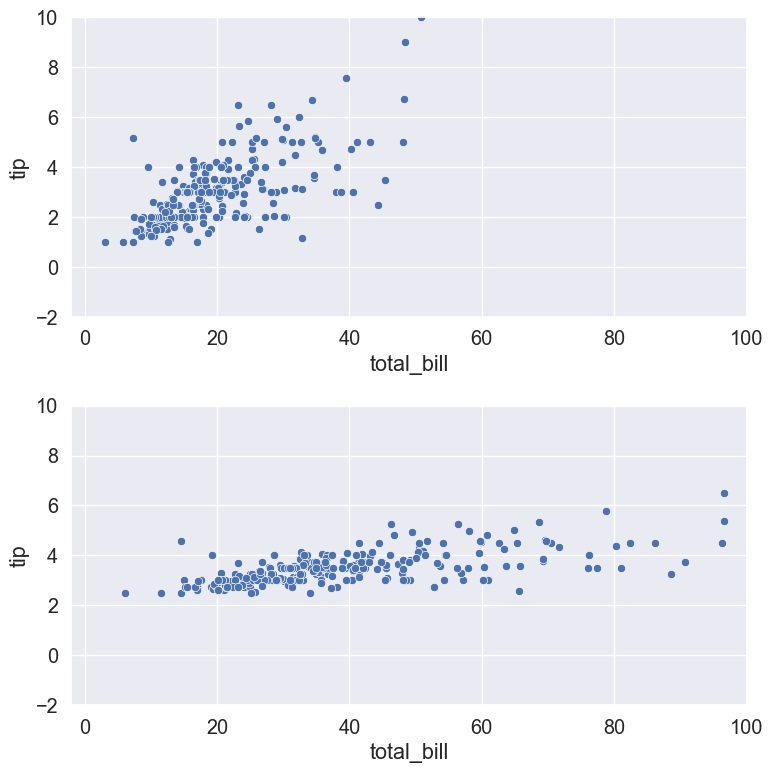

In [63]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.scatterplot(x=df['total_bill'], y=df['tip']);
plt.xlim(-2,100)
plt.ylim(-2,10)


plt.subplot(212)
sns.scatterplot(x=df['total_bill']*2, y=2+df['tip']/2);
plt.xlim(-2,100)
plt.ylim(-2,10)

plt.tight_layout()
plt.show()

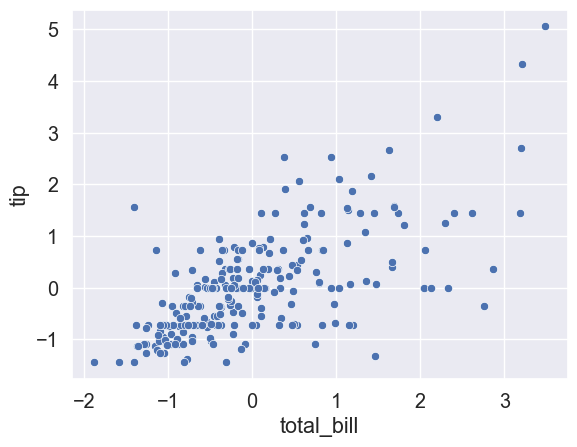

In [64]:
sns.scatterplot(x=(df['total_bill']-df['total_bill'].mean())/df['total_bill'].std(), 
                y=(df['tip']-df['tip'].mean())/df['tip'].std());

## Кодирование категориальных переменных

In [65]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_boxcox,total_bill_log
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.146272,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.263499,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,0.343298,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.621586,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,0.709646,3.242202


In [67]:
df.shape

(244, 9)

In [66]:
pd.get_dummies(df, drop_first=True)

,total_bill,tip,size,total_bill_boxcox,total_bill_log,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,-0.146272,2.889816,False,False,False,True,False,False
1,10.34,1.66,3,-1.263499,2.428336,True,False,False,True,False,False
2,21.01,3.50,3,0.343298,3.091497,True,False,False,True,False,False
3,23.68,3.31,2,0.621586,3.205993,True,False,False,True,False,False
4,24.59,3.61,4,0.709646,3.242202,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.099066,3.402197,True,False,True,False,False,False
240,27.18,2.00,2,0.944244,3.338613,False,True,True,False,False,False
241,22.67,2.00,2,0.519996,3.164208,True,True,True,False,False,False
242,17.82,1.75,2,-0.036853,2.934920,True,False,True,False,False,False


In [68]:
pd.get_dummies(df, drop_first=True).shape

(244, 11)

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cat_cols = ['sex','smoker','day','time']
X = ohe.fit_transform(df[cat_cols])

In [70]:
X.toarray().shape

(244, 10)

In [71]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cat_cols = ['sex','smoker','day','time']
X = ord_enc.fit_transform(df[cat_cols])

In [72]:
ord_enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [73]:
df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: object

In [74]:
df['day'].map({'Fri':0, 'Sat':1, 'Sun':2, 'Thur':3})

0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day, Length: 244, dtype: int64